### Stock price predictor



[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 26.4885


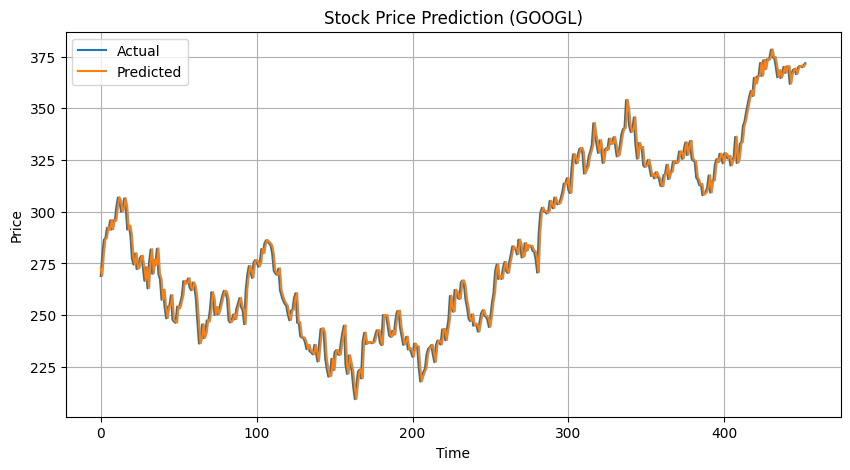

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load stock data from Yahoo Finance
df = yf.download("MSFT", start="2015-01-01", end="2023-12-31")  # Google stock
df = df[['Close']]
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

# Features and Labels
X = df[['Close']]
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Stock Price Prediction (GOOGL)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL Mean Squared Error: 8.6638
AMZN Mean Squared Error: 12.4084
TATASTEEL.NS Mean Squared Error: 7.1185


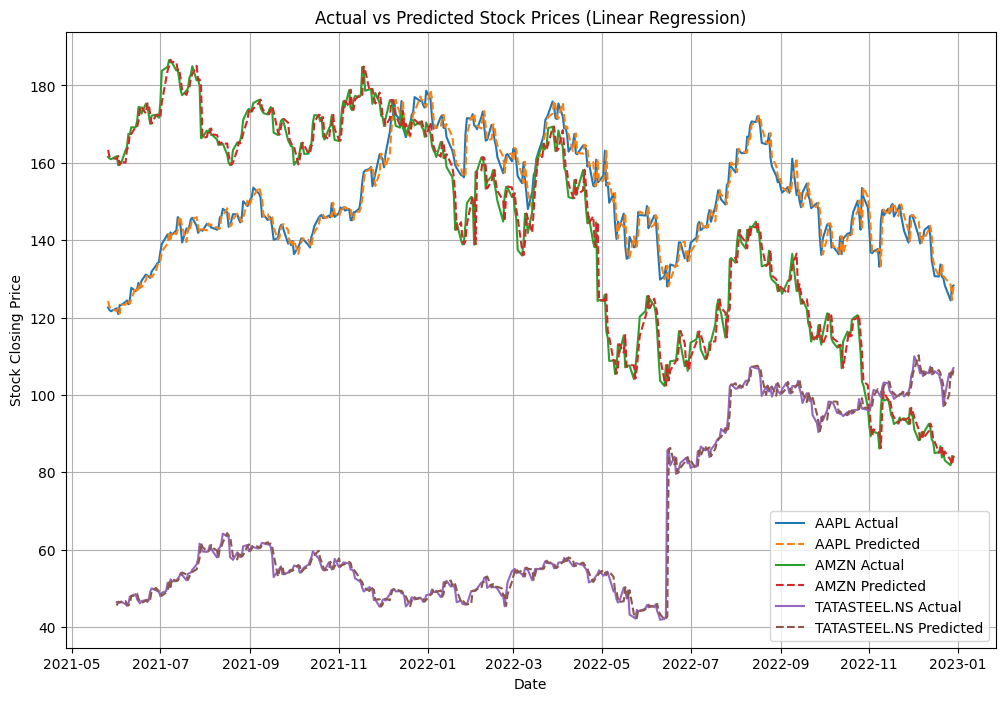

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# List of tickers
tickers = ['AAPL', 'AMZN','TATASTEEL.NS']

plt.figure(figsize=(12, 8))

for ticker in tickers:
    # Download data
    data = yf.download(ticker, start="2015-01-01", end="2023-01-01")[['Close']]

    # Prepare dataset
    data['Target'] = data['Close'].shift(-1)  # next day close price as target
    data.dropna(inplace=True)

    X = data[['Close']]
    y = data['Target']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train linear regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"{ticker} Mean Squared Error: {mse:.4f}")

    # Plot actual vs predicted for the test period
    plt.plot(y_test.index, y_test.values, label=f'{ticker} Actual')
    plt.plot(y_test.index, y_pred, linestyle='--', label=f'{ticker} Predicted')

plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


AAPL Mean Squared Error: 25.4867


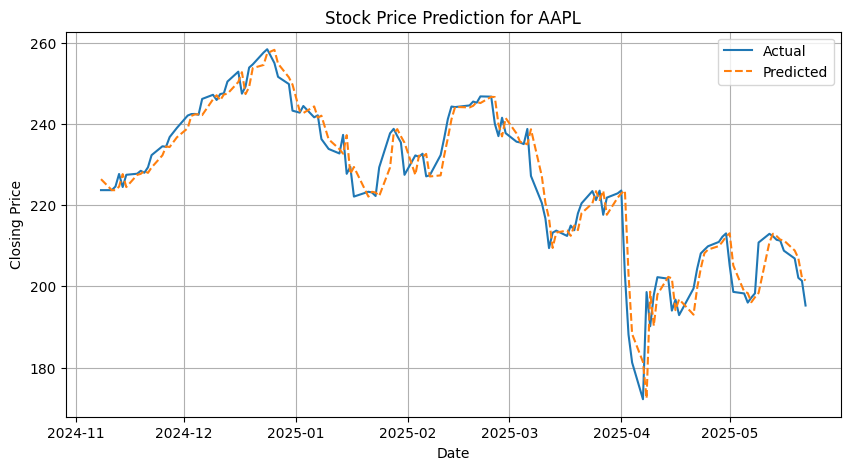

[*********************100%***********************]  1 of 1 completed


AMZN Mean Squared Error: 22.4182


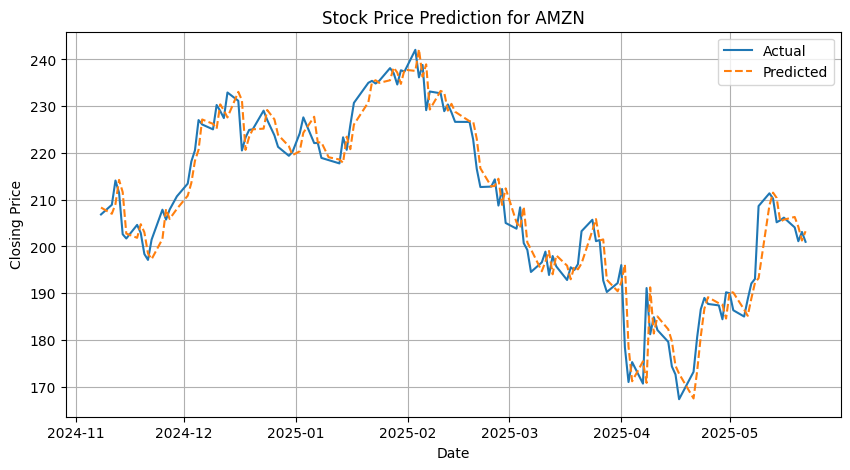

[*********************100%***********************]  1 of 1 completed


TATASTEEL.NS Mean Squared Error: 7.9266


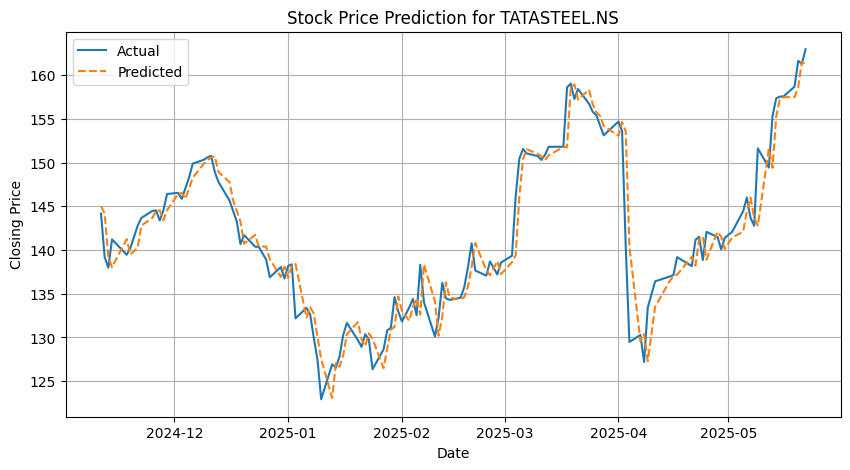

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def train_and_predict_stock(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    data['Target'] = data['Close'].shift(-1)
    data.dropna(inplace=True)

    X = data[['Close']]
    y = data['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"{ticker} Mean Squared Error: {mse:.4f}")

    # Plot actual vs predicted for this stock
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test.values, label='Actual')
    plt.plot(y_test.index, y_pred, linestyle='--', label='Predicted')
    plt.title(f'Stock Price Prediction for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function separately for each stock
tickers = ['AAPL', 'AMZN','TATASTEEL.NS']
for t in tickers:
    train_and_predict_stock(t, "2022-10-01", "2025-05-26")


###Spam Message Detection

In [29]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)


svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_preds = svm_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print(" SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("\n Classification Report (SVM):\n", classification_report(y_test, svm_preds))

while True:
    user_msg = input("\n Enter a message (or type 'exit' to quit): ")
    if user_msg.lower() == 'exit':
        print("Exiting. Thank you!")
        break
    user_tfidf = vectorizer.transform([user_msg])
    prediction = svm_model.predict(user_tfidf)[0]
    label = "Spam" if prediction == 1 else "(Not Spam)"
    print(f" Prediction: {label}")


Saving spam.csv to spam (1).csv
Naive Bayes Accuracy: 0.9623318385650225
 SVM Accuracy: 0.9829596412556054

 Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


 Enter a message (or type 'exit' to quit): "This is not a scam! Claim your free iPhone by clicking the link below."
 Prediction: Spam

 Enter a message (or type 'exit' to quit): Limited time offer! Lowest prices on electronics, shop now before it ends."
 Prediction: (Not Spam)

 Enter a message (or type 'exit' to quit): Let's meet at the café at 4 PM.
 Prediction: (Not Spam)

 Enter a message (or type 'exit' to quit): exit
Exiting. Thank you!
